In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [3]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    # df = pd.read_csv(dataset[year], chunksize=chanksize, compression='gzip')

In [4]:
file_name = "Data/[1]game_logs.csv"
read_file(file_name)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_13428/1551661027.py:2: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  read_file(file_name)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,...,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,...,1.0,watef102,Fred Waterman,5.0,forcd101,Davy Force,6.0,mille105,Everett Mills,3.0,allid101,Doug Allison,2.0,hallg101,George Hall,7.0,leona101,Andy Leonard,4.0,braia102,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,4,54.0,D,NaN,NaN,NaN,RCK01,1000.0,140.0,610020003,010020100,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0.0,...,6.0,mackd101,Denny Mack,3.0,addyb101,Bob Addy,4.0,fishc102,Cherokee Fisher,1.0,hasts101,Scott Hastings,8.0,ham-r101,Ralph Ham,5.0,ansoc101,Cap Anson,2.0,sagep101,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,14,54.0,D,NaN,NaN,NaN,CHI01,5000.0,150.0,101403111,077000000,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,0.0,...,6.0,mcatb101,Bub McAtee,3.0,kingm101,Marshall King,8.0,hodec101,Charlie Hodes,2.0,woodj106,Jimmy Wood,4.0,simmj101,Joe Simmons,9.0,folet101,Tom Foley,7.0,duffe101,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,5,54.0,D,NaN,NaN,NaN,TRO01,3250.0,145.0,000002232,101003000,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0.0,...,1.0,flync101,Clipper Flynn,9.0,mcgem101,Mike McGeary,2.0,yorkt101,Tom York,8.0,mcmuj101,John McMullin,1.0,kings101,Steve King,7.0,beave101,Edward Beavens,4.0,bells101,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,0200000202,1100100010,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,...,1.0,blacc001,Charlie Blackmon,8.0,dahld001,David Dahl,7.0,arenn001,Nolan Arenado,5.0,gonzc001,Carlos Gonzalez,9.0,murpt002,Tom Murphy,2.0,pattj005,Jordan Patterson,3.0,valap001,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,000001100,00100031x,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,hernc005,Cesar Hernandez,4.0,parej002,Jimmy Paredes,7.0,herro001,Odubel Herrera,8.0,franm004,Maikel Franco,5.0,howar001,Ryan Howard,3.0,ruppc001,Cameron Rupp,2.0,blana001,Andres Blanco,6.0,altha001,Aaron Altherr,9.0,eickj001,Jerad Eickhoff,1.0,NaN,Y
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51.0,D,NaN,NaN,NaN,SFO03,41445.0,184.0,000100000,23000002x,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,spand001,Denard Span,8.0,beltb001,Brandon Belt,3.0,poseb001,Buster Posey,2

In [5]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [6]:
file_name = "Data/[1]game_logs.csv"
dataset = read_file(file_name)
output_file = "результаты_1.json"
get_memory_stat_by_column(dataset, output_file)

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_13428/867221245.py:2: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  dataset = read_file(file_name)


In [7]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [8]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [9]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [10]:
converted_obj = opt_obj(dataset)

750.57 MB
49.89 MB


In [11]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [12]:
converted_int = opt_int(dataset)

7.87 MB
1.48 MB
               before   after
date            int64  uint32
number_of_game  int64   uint8
v_game_number   int64   uint8
h_game_number   int64   uint8
v_score         int64   uint8
h_score         int64   uint8


In [13]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [14]:
converted_float = opt_float(dataset)

100.99 MB
50.49 MB
                     before    after
length_outs         float64  float32
attendance          float64  float32
length_minutes      float64  float32
v_at_bats           float64  float32
v_hits              float64  float32
...                     ...      ...
h_player_5_def_pos  float64  float32
h_player_6_def_pos  float64  float32
h_player_7_def_pos  float64  float32
h_player_8_def_pos  float64  float32
h_player_9_def_pos  float64  float32

[77 rows x 2 columns]


In [15]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

859.43 MB
101.86 MB


In [16]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [17]:
need_column = dict()
column_names = ['date', 'number_of_game', 'day_of_week',
           'park_id', 'v_manager_name', 'length_minutes',
           'v_hits', 'h_hits', 'h_walks', 'h_errors']

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_1.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_1.csv', mode='a', header=has_header)
    has_header = False

date:uint32
number_of_game:uint8
day_of_week:category
park_id:category
v_manager_name:category
length_minutes:float32
v_hits:float32
h_hits:float32
h_walks:float32
h_errors:float32
2.94 MB
2.14 MB


In [18]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_1.json")

dataset = pd.read_csv("df_1.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column,
                  parse_dates=['date'])
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            171907 non-null  datetime64[ns]
 1   number_of_game  171907 non-null  uint8         
 2   day_of_week     171907 non-null  category      
 3   park_id         171907 non-null  category      
 4   length_minutes  136701 non-null  float32       
 5   v_hits          140838 non-null  float32       
 6   h_hits          140838 non-null  float32       
 7   h_walks         140838 non-null  float32       
 8   h_errors        140838 non-null  float32       
 9   v_manager_name  171907 non-null  category      
dtypes: category(3), datetime64[ns](1), float32(5), uint8(1)
memory usage: 5.7 MB


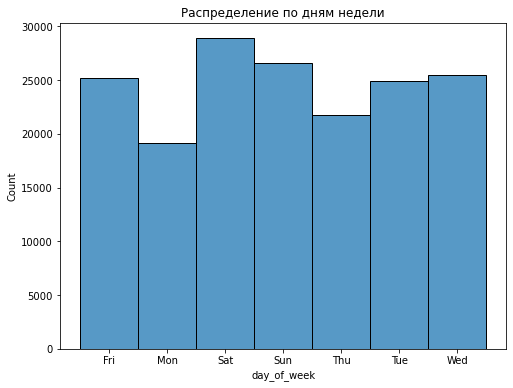

In [45]:
# Гистограмма для распределения по дням недели
plt.figure(figsize=(8, 6))
sns.histplot(dataset['day_of_week'], bins=20)
plt.title('Распределение по дням недели')
plt.show()

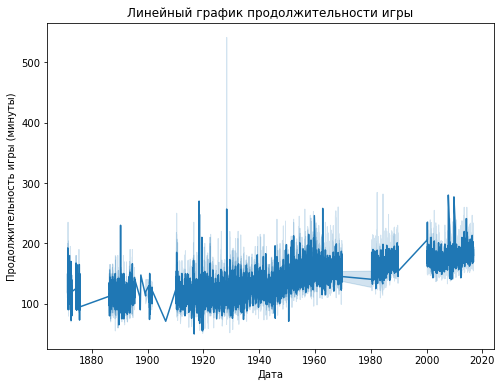

In [42]:
# Линейный график продолжительности игры
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='length_minutes', data=dataset)
plt.xlabel('Дата')
plt.ylabel('Продолжительность игры (минуты)')
plt.title('Линейный график продолжительности игры')
plt.show()

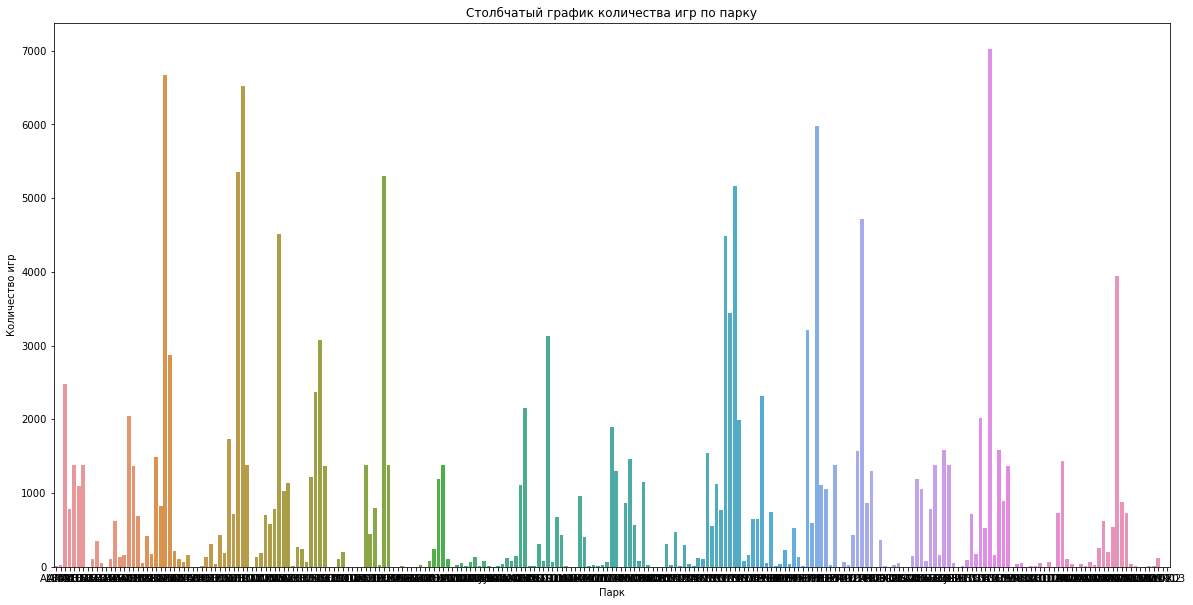

In [39]:
# Столбчатый график количества игр по парку
plt.figure(figsize=(20, 10))
sns.countplot(x='park_id', data=dataset)
plt.xlabel('Парк')
plt.ylabel('Количество игр')
plt.title('Столбчатый график количества игр по парку')
plt.show()

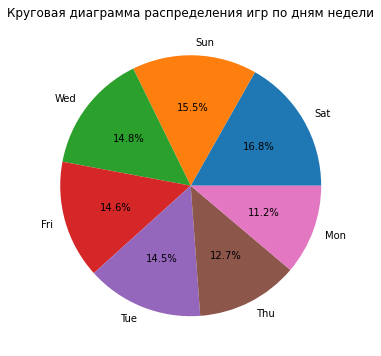

In [40]:
# Круговая диаграмма распределения игр по паркам
plt.figure(figsize=(8, 6))
park_counts = data['day_of_week'].value_counts()
plt.pie(park_counts, labels=park_counts.index, autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения игр по дням недели')
plt.show()

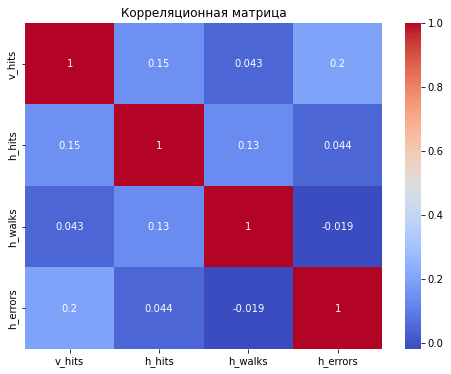

In [41]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['v_hits', 'h_hits', 'h_walks', 'h_errors']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()